# **This file is focuing on Original text review analysis**

In [ ]:
import gdown
import pandas as pd

file_id = "170Rt-TYzGDMxcIrRWSe2KavAtVxC1pP6"
gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)

#https://drive.google.com/drive/folders/1yrpAl9BiZyvn7dAg3OL0cf7NdWTFISg1

df = pd.read_csv("Yelp_Restaurant_Reviews.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=170Rt-TYzGDMxcIrRWSe2KavAtVxC1pP6
To: /content/Yelp_Restaurant_Reviews.csv
100%|██████████| 11.3M/11.3M [00:00<00:00, 112MB/s]


,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


In [ ]:
df['Yelp URL'].unique()

array(['https://www.yelp.com/biz/sidney-dairy-barn-sidney',
       'https://www.yelp.com/biz/rewind-ice-cream-boba-tea-chandler-3',
       'https://www.yelp.com/biz/carlos-bakery-las-vegas-3',
       'https://www.yelp.com/biz/the-vegan-doughnut-company-lakewood-3',
       'https://www.yelp.com/biz/the-butterwood-bake-consortium-pittsburgh',
       'https://www.yelp.com/biz/handels-homemade-ice-cream-and-yogurt-las-vegas-3',
       'https://www.yelp.com/biz/am%C3%A9lies-french-bakery-and-caf%C3%A9-charlotte-11',
       'https://www.yelp.com/biz/bouchon-bakery-las-vegas-10',
       'https://www.yelp.com/biz/novel-ice-cream-phoenix',
       'https://www.yelp.com/biz/sweet-republic-scottsdale-2',
       'https://www.yelp.com/biz/sprinkles-las-vegas-las-vegas',
       'https://www.yelp.com/biz/fatty-daddys-scottsdale-5',
       'https://www.yelp.com/biz/85-c-bakery-cafe-las-vegas-2',
       'https://www.yelp.com/biz/melt-phoenix',
       'https://www.yelp.com/biz/jack-frost-donuts-cleveland

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Yelp URL     19896 non-null  object
 1   Rating       19896 non-null  int64 
 2   Date         19896 non-null  object
 3   Review Text  19896 non-null  object
dtypes: int64(1), object(3)
memory usage: 621.9+ KB


1. Data Selection & Cleaning
Filtered a Yelp review dataset to include only reviews from 2021 onward

Cleaned review text by:

* Converting to lowercase

* Removing punctuation, numbers, and stopwords

* Tokenizing and simplifying the text for modeling


In [ ]:
# Pre-Processing 'Review' Column

import nltk
from nltk.corpus import stopwords
import re
from textblob import TextBlob

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text.lower())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['Review Text'] = df['Review Text'].apply(clean_text)
df['Review Text'] [:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review Text
0,say good ice cream would sure recommend cookie...
1,nice little local place ice creammy favorite p...
2,delicious treat hot day staff friendly helpful...
3,great service fun crew got banana cream pie ch...
4,one favorite places get ice cream cu area bit ...


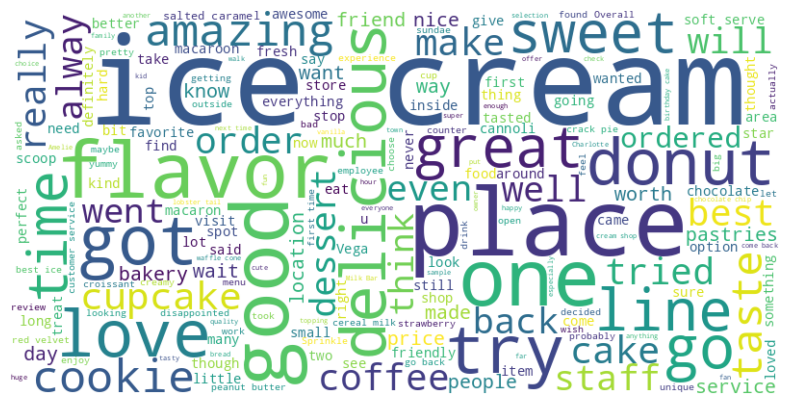

In [ ]:
# a word cloud for Review Text

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the cleaned reviews into a single string
text = " ".join(review for review in df['Review Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The word cloud visualizes the frequency of words in the cleaned Yelp restaurant reviews. Larger words indicate higher frequency in the dataset.  It provides a quick overview of the most common terms used in the reviews, offering insights into prominent themes or topics discussed by diners.  For example, frequent words like "ice-cream," "place," or "flavor" would indicate these are key aspects reviewers focus on.  The absence of certain words (particularly after stop word removal) helps highlight meaningful terms, rather than common grammatical words.  Essentially, it's a visual summary of the most prevalent terms within the review text.


Descriptive Statistics for Numerical Features:
              Rating
count  19896.000000
mean       4.130830
std        1.200746
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

Rating Counts:
 Rating
5    10883
4     4447
3     2069
2     1280
1     1217
Name: count, dtype: int64


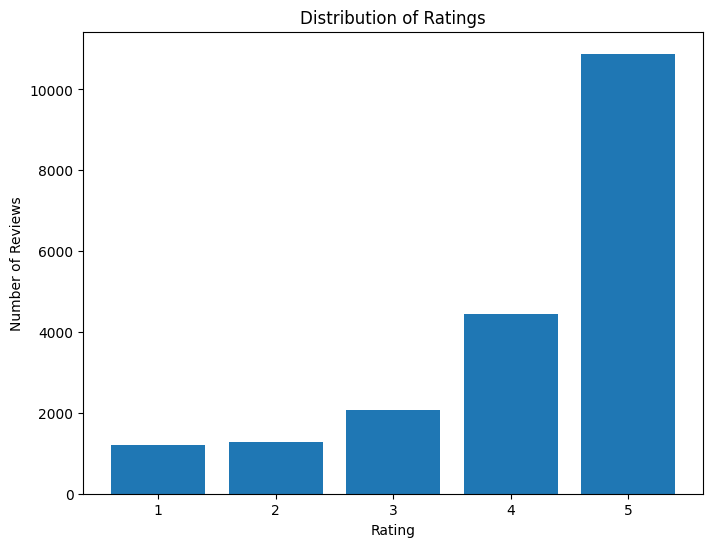

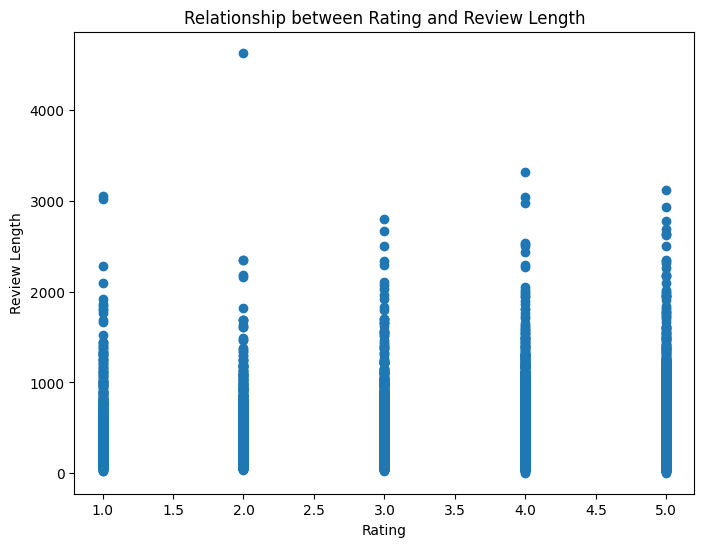

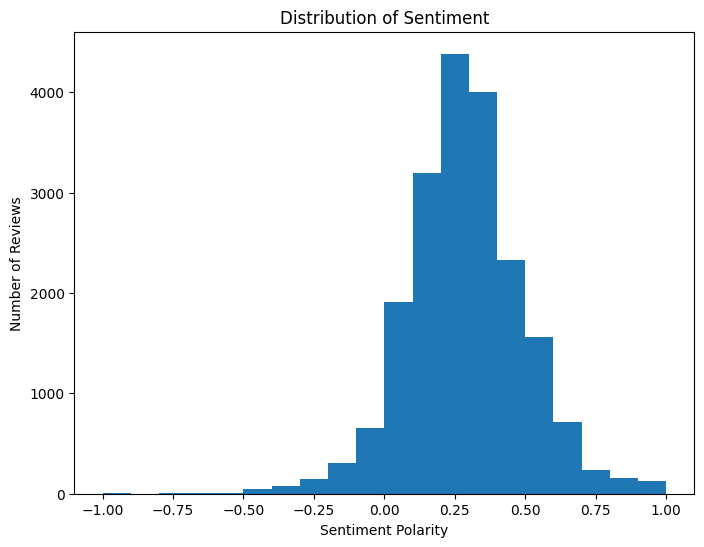


Correlation between Rating and Sentiment: 0.48903567365821643


In [ ]:
# Exploratory Data Analysis ​

import matplotlib.pyplot as plt
# Calculate descriptive statistics for numerical features
numerical_stats = df.describe()
print("Descriptive Statistics for Numerical Features:\n", numerical_stats)

# Analyze the distribution of ratings
rating_counts = df['Rating'].value_counts()
print("\nRating Counts:\n", rating_counts)

plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Ratings")
plt.show()


# Explore the relationship between rating and review length
df['Review Length'] = df['Review Text'].apply(len)
plt.figure(figsize=(8, 6))
plt.scatter(df['Rating'], df['Review Length'])
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Relationship between Rating and Review Length")
plt.show()

# Further analysis can include:
# - Sentiment analysis of reviews using TextBlob
# - Topic modeling to identify common themes in reviews
# - Correlation analysis between features
# - Visualization of review text lengths by rating


# Example of Sentiment Analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment'] = df['Review Text'].apply(analyze_sentiment)

plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment'], bins=20)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Sentiment")
plt.show()

# Correlation analysis between rating and sentiment
correlation = df['Rating'].corr(df['Sentiment'])
print(f"\nCorrelation between Rating and Sentiment: {correlation}")


The correlation of 0.48 between Rating and Sentiment indicates a moderately positive relationship between the two variables in your dataset.  Here's a breakdown:

* **Positive Correlation:**  A positive correlation means that as one variable increases, the other tends to increase as well. In this case, higher ratings are associated with more positive sentiment scores.

* **Moderate Strength:** A correlation of 0.52 is considered a moderate correlation.  It's not extremely strong (a value closer to 1.0 would indicate a stronger relationship), but it's still a noticeable association.  This suggests that sentiment is a factor influencing ratings, but other factors are also likely at play.  A correlation of 1.0 would be a perfect positive relationship, where every increase in one variable corresponds to a perfectly proportional increase in the other.

* **Practical Significance:** While the statistical relationship is moderate, its practical significance depends on your goals. A correlation of 0.52 might be considered significant depending on the field of study and the overall variation in the data.  For example, in a field with typically lower correlations, this could be considered a strong relationship.

**In the context of your Yelp reviews:**  Reviews with higher sentiment scores (more positive language) tend to have higher ratings, and vice-versa.  However, there's still a considerable amount of variation, meaning that sentiment alone can't perfectly predict the rating. Other factors like the quality of service, food, atmosphere, etc., could influence a user's rating independently of their expressed sentiment in the review text.


In [ ]:
#  between 2022 and the newest date

df['Date'] = pd.to_datetime(df['Date'])

df_filtered = df[(df['Date'].dt.year >= 2022)]

df_filtered.count()

,0
Yelp URL,1138
Rating,1138
Date,1138
Review Text,1138
Review Length,1138
Sentiment,1138


In [ ]:
from textblob import TextBlob
import numpy as np

# Extract restaurant name from the Yelp URL
df_filtered["Restaurant"] = df_filtered["Yelp URL"].str.extract(r"yelp\.com/biz/([^/?#]+)")
df_filtered["Restaurant"] = df_filtered["Restaurant"].str.replace("-", " ").str.title()

# Calculate sentiment polarity using TextBlob
df_filtered["sent_polarity"] = df_filtered["Review Text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Group by restaurant to compute average rating and average sentiment
restaurant_summary = df_filtered.groupby("Restaurant").agg(
    avg_rating=("Rating", "mean"),
    avg_sentiment=("sent_polarity", "mean"),
    review_count=("Review Text", "count")
).reset_index()

# Round for display
restaurant_summary["avg_rating"] = restaurant_summary["avg_rating"].round(2)
restaurant_summary["avg_sentiment"] = restaurant_summary["avg_sentiment"].round(2)

# Display the result
restaurant_summary

<ipython-input-6-dc2800a7bff1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Restaurant"] = df_filtered["Yelp URL"].str.extract(r"yelp\.com/biz/([^/?#]+)")
<ipython-input-6-dc2800a7bff1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Restaurant"] = df_filtered["Restaurant"].str.replace("-", " ").str.title()
<ipython-input-6-dc2800a7bff1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Restaurant,avg_rating,avg_sentiment,review_count
0,85 C Bakery Cafe Las Vegas 2,3.60,0.23,53
1,Am%C3%A9Lies French Bakery And Caf%C3%A9 Charl...,4.05,0.32,66
2,Batch Bakehouse Madison,4.85,0.42,13
3,Bouchon Bakery Las Vegas 10,4.08,0.31,40
4,Caff%C3%A9 Bene Urbana 3,3.00,-0.10,1
5,Campbells Sweets Factory Cleveland,5.00,0.34,2
6,Carlos Bakery Las Vegas 3,3.39,0.20,56
7,Chocolate Shoppe Ice Cream Madison 2,5.00,0.23,1
8,Churn Homemade Ice Cream And Coffee Pittsburgh,4.82,0.26,11
9,Churn Phoenix 3,4.43,0.35,44


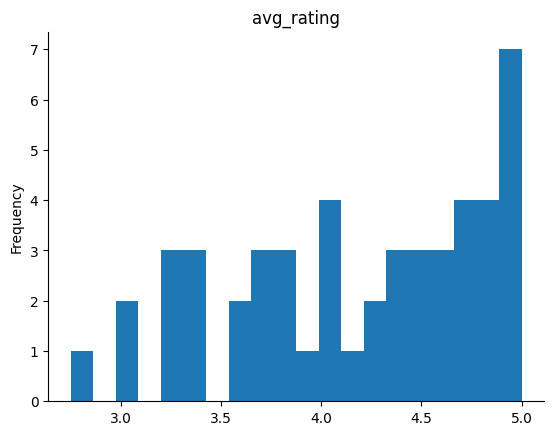

In [ ]:
# @title avg_rating

from matplotlib import pyplot as plt
restaurant_summary['avg_rating'].plot(kind='hist', bins=20, title='avg_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

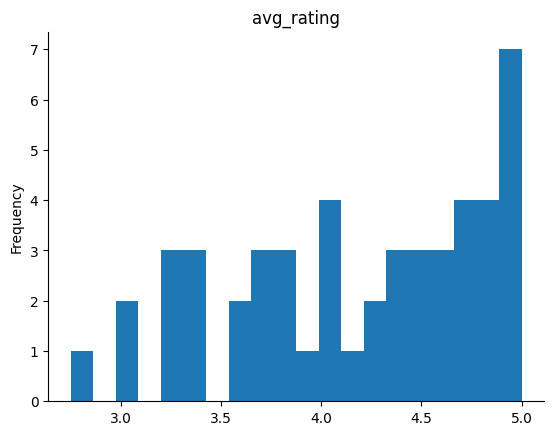

In [ ]:
# @title avg_rating

from matplotlib import pyplot as plt
restaurant_summary['avg_rating'].plot(kind='hist', bins=20, title='avg_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

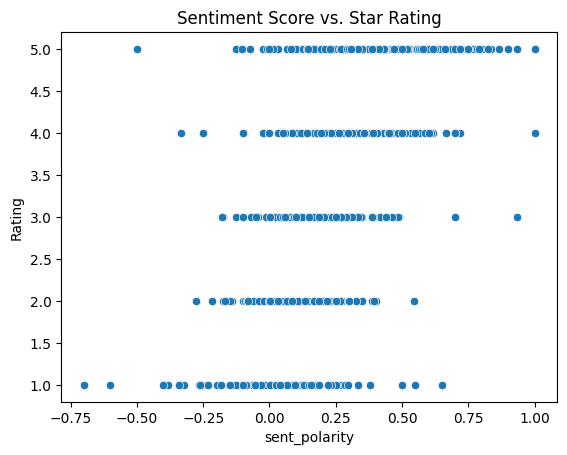

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_filtered, x='sent_polarity', y='Rating')
plt.title("Sentiment Score vs. Star Rating")
plt.show()

<Axes: xlabel='Rating', ylabel='sent_polarity'>

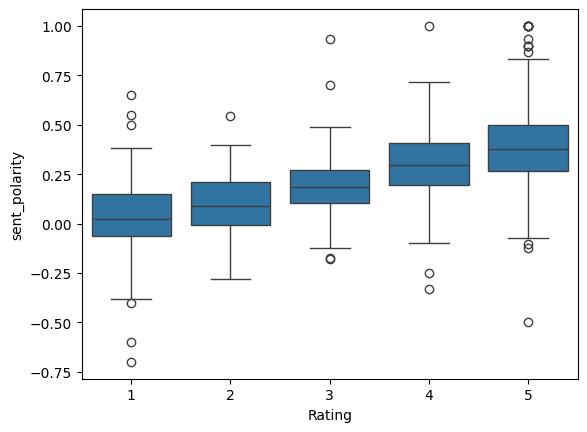

In [ ]:
sns.boxplot(x='Rating', y='sent_polarity', data=df_filtered)

<Axes: xlabel='sent_polarity', ylabel='Rating'>

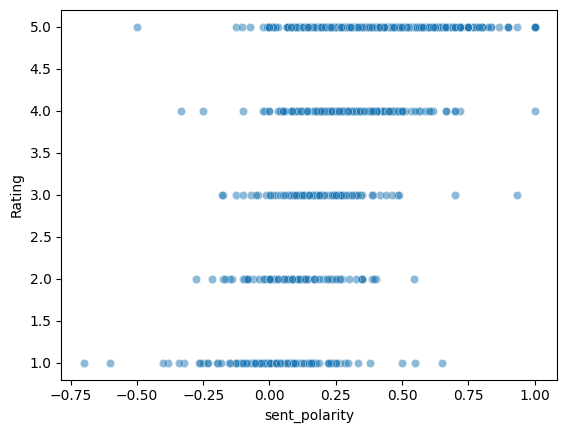

In [ ]:
sns.scatterplot(x='sent_polarity', y='Rating', data=df_filtered, alpha=0.5)


2. Label Creation
Mapped review star ratings into three sentiment categories:

* positive (ratings 4–5)


* negative (ratings 1–3)

In [ ]:
def sentiment_label_binary(rating):
    return 'positive' if rating >= 4 else 'negative'

df_filtered['sent_category'] = df_filtered['Rating'].apply(sentiment_label_binary)


<ipython-input-11-bf926e2ee508>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sent_category'] = df_filtered['Rating'].apply(sentiment_label_binary)


In [ ]:
TextBlob("I absolutely loved the dessert!").sentiment.polarity

0.875

In [ ]:
df_filtered.head()

,Yelp URL,Rating,Date,Review Text,Review Length,Sentiment,Restaurant,sent_polarity,sent_category
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,say good ice cream would sure recommend cookie...,68,0.633333,Sidney Dairy Barn Sidney,0.633333,positive
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,nice little local place ice creammy favorite p...,199,0.273661,Sidney Dairy Barn Sidney,0.273661,positive
26,https://www.yelp.com/biz/rewind-ice-cream-boba...,5,2022-04-20,protip definitely give rotating ice cream flav...,409,0.238802,Rewind Ice Cream Boba Tea Chandler 3,0.238802,positive
27,https://www.yelp.com/biz/rewind-ice-cream-boba...,3,2022-07-18,seeing positive reviews rewind wanted stop che...,1371,0.248963,Rewind Ice Cream Boba Tea Chandler 3,0.248963,negative
28,https://www.yelp.com/biz/rewind-ice-cream-boba...,3,2022-07-13,got special orange creamsicle flavored soft se...,280,0.072024,Rewind Ice Cream Boba Tea Chandler 3,0.072024,negative


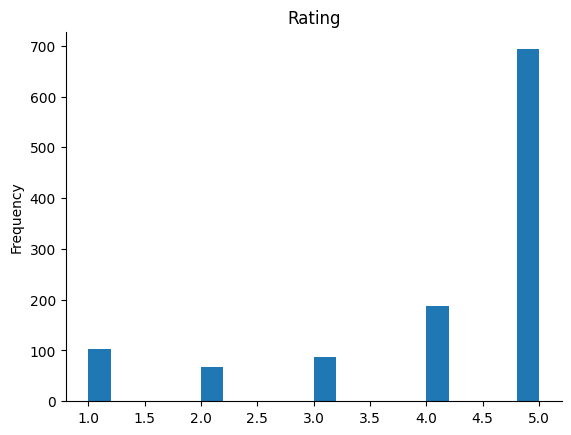

In [ ]:
# @title Rating

from matplotlib import pyplot as plt
df_filtered['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

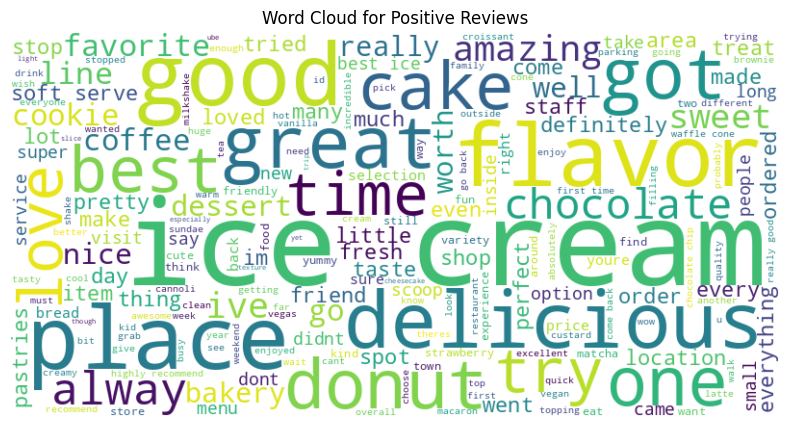

In [ ]:
# word cloud for positive

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter for positive reviews
positive_reviews = df_filtered[df_filtered['sent_category'] == 'positive']['Review Text']

# Combine all positive reviews into a single string
positive_text = " ".join(review for review in positive_reviews)

# Generate the word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


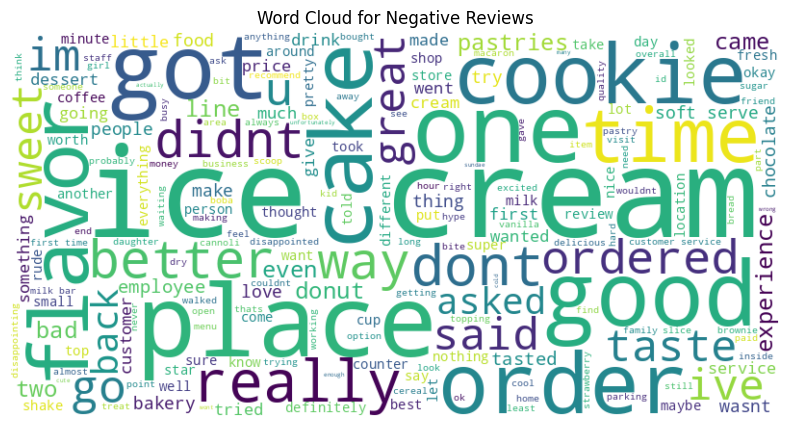

In [ ]:
# word cloud for negative

import matplotlib.pyplot as plt
# Assuming df_filtered and sentiment_label_binary are defined as in your provided code.

# Filter for negative reviews
negative_reviews = df_filtered[df_filtered['sent_category'] == 'negative']['Review Text']

# Combine all negative reviews into a single string
negative_text = " ".join(review for review in negative_reviews)

# Generate the word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews') # Added a title for clarity
plt.show()


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138 entries, 0 to 19886
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Yelp URL       1138 non-null   object        
 1   Rating         1138 non-null   int64         
 2   Date           1138 non-null   datetime64[ns]
 3   Review Text    1138 non-null   object        
 4   Restaurant     1138 non-null   object        
 5   sent_polarity  1138 non-null   float64       
 6   sent_category  1138 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 71.1+ KB


4. Classification Pipeline
Planned to use the generated embeddings as input features

* Created numerical labels (0, 1) for training

* Set up train-test split for evaluation

* Selected logistic regression as an initial classifier for simplicity and interpretability

In [ ]:
# add label
label_map = {'negative': 0, 'positive': 1}
df_filtered['label'] = df_filtered['sent_category'].map(label_map)

<ipython-input-43-d36e7c3c9138>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['label'] = df_filtered['sent_category'].map(label_map)


In [ ]:
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertModel
import torch
import numpy as np

# Load DistilBERT model + tokenizer (if not already loaded)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
model.eval()

# Define get_embedding function to generate embeddings
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=64)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()
    return embeddings[0]  # Return the first embedding since we're processing a single text

# Generate embeddings
df_filtered['embedding'] = df_filtered['Review Text'].apply(get_embedding)

# Prepare X and y
X = np.stack(df_filtered['embedding'].values)
y = df_filtered['label'].values

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-44-5ff59d629e8e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['embedding'] = df_filtered['Review Text'].apply(get_embedding)


In [ ]:
print(X.shape)
print(y.shape)


(1138, 768)
(1138,)


In [ ]:
# deal imbalance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


clf = LogisticRegression(class_weight='balanced')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))


              precision    recall  f1-score   support

    negative       0.67      0.72      0.69        50
    positive       0.92      0.90      0.91       178

    accuracy                           0.86       228
   macro avg       0.79      0.81      0.80       228
weighted avg       0.86      0.86      0.86       228



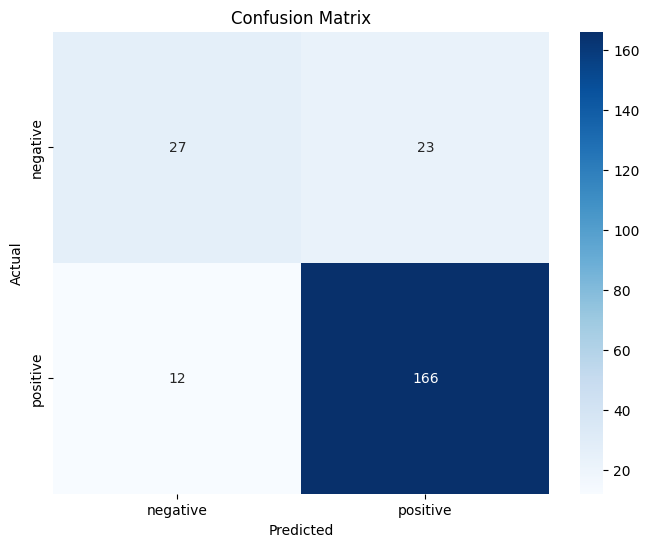

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# deal imbalance
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced')

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=label_map.keys()))

              precision    recall  f1-score   support

    negative       0.62      0.20      0.30        50
    positive       0.81      0.97      0.88       178

    accuracy                           0.80       228
   macro avg       0.72      0.58      0.59       228
weighted avg       0.77      0.80      0.76       228



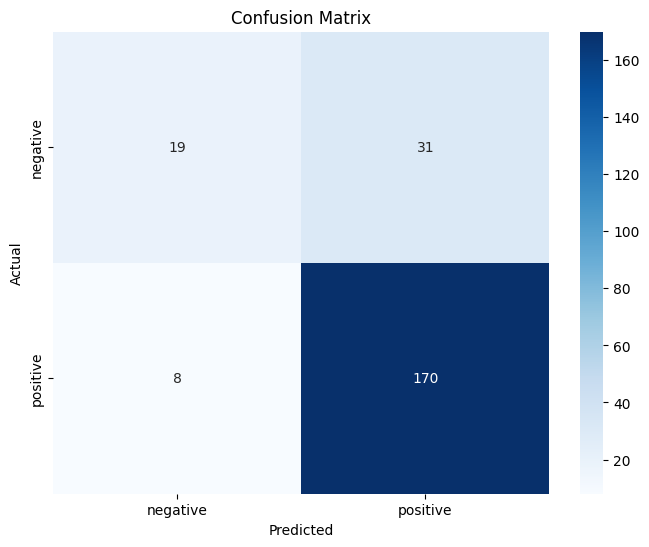

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(256, 128),  random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print(classification_report(y_test, y_pred_mlp, target_names=label_map.keys()))

              precision    recall  f1-score   support

    negative       0.68      0.54      0.60        50
    positive       0.88      0.93      0.90       178

    accuracy                           0.84       228
   macro avg       0.78      0.73      0.75       228
weighted avg       0.83      0.84      0.84       228



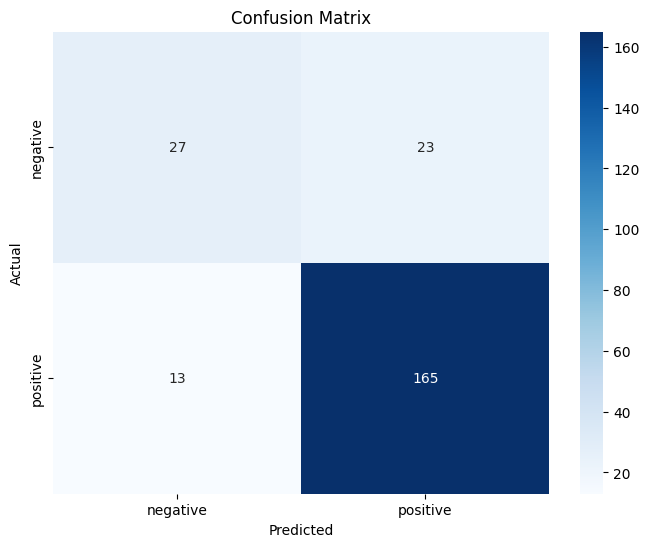

In [ ]:
cm = confusion_matrix(y_test, y_pred_mlp)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train the model
XGBmodel = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
XGBmodel.fit(X_train, y_train)

# Predict
y_pred_xgb = XGBmodel.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_xgb, target_names=label_map.keys()))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:12:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

    negative       0.65      0.40      0.49        50
    positive       0.85      0.94      0.89       178

    accuracy                           0.82       228
   macro avg       0.75      0.67      0.69       228
weighted avg       0.80      0.82      0.80       228



Compare 4 model


In [ ]:
models = {
    "Logistic Regression": y_pred,
    "Random Forest": y_pred_rf,
    "MLP": y_pred_mlp,
    "XGBoost": y_pred_xgb
}


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

for name, pred in models.items():
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='macro')
    print(f"{name:<20} | Accuracy: {acc:.3f} | Macro F1: {f1:.3f}")


Logistic Regression  | Accuracy: 0.860 | Macro F1: 0.801
Random Forest        | Accuracy: 0.807 | Macro F1: 0.637
MLP                  | Accuracy: 0.820 | Macro F1: 0.692
XGBoost              | Accuracy: 0.820 | Macro F1: 0.692


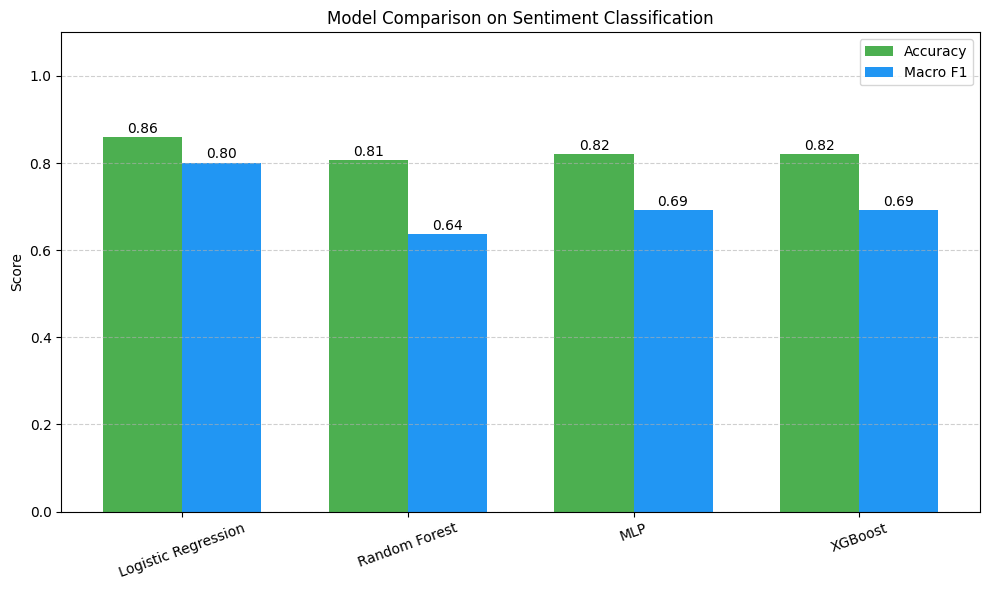

In [ ]:
# Re-import after code state reset
import matplotlib.pyplot as plt
import numpy as np

# Simulated model results (same as before)
model_names = ['Logistic Regression', 'Random Forest', 'MLP', 'XGBoost']
accuracies = [0.860, 0.807, 0.820, 0.820]
macro_f1s = [0.801, 0.637, 0.692, 0.692]

# Plot setup
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, accuracies, width, label='Accuracy', color='#4CAF50')
bars2 = plt.bar(x + width/2, macro_f1s, width, label='Macro F1', color='#2196F3')

# Annotate bars with scores
for bar in bars1:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

# Final touches
plt.ylabel("Score")
plt.title("Model Comparison on Sentiment Classification")
plt.xticks(x, model_names, rotation=20)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
